In [1]:
from data_processing_try import *
from train_trace_2 import *
from visualization import plot_ith_segment

In [2]:
data = Dataset("set1_imu.csv", "set1_tab.csv")

merging the data sets...
calculate the quaternion representations...
calculate the rotation matrices...
calculate the navigation frame representation...
integrate the acceleration...


In [3]:
data.data_set.head()

,t_r,x,y,z,ax,ay,az,gx,gy,gz,...,nav_ay,nav_az,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z,dx,dy
0,0.0,171.081563,175.444042,0.0,-0.846652,0.333538,0.358858,0.030683,-0.051090,-0.443710,...,-0.256070,-0.643924,0.000000,0.000000,0.000000,171.081563,175.444042,0.000000,0.000000,0.000000
1,0.5,170.148674,174.619624,0.0,-0.863770,0.266961,0.328226,-0.098304,-0.025454,-0.393085,...,-0.354587,-0.658915,-0.323676,-0.152664,-0.325710,171.000643,175.405875,-0.081427,-0.932889,-0.824417
2,1.0,169.290593,173.889512,0.0,-0.878953,0.216098,0.305050,-0.191155,-0.007150,-0.326313,...,-0.417381,-0.650395,-0.615088,-0.345656,-0.653037,170.765953,175.281295,-0.326114,-0.858081,-0.730112
3,1.5,168.504520,173.249715,0.0,-0.882562,0.259232,0.326468,-0.067845,-0.032703,-0.162954,...,-0.398371,-0.645887,-0.908885,-0.549594,-0.977108,170.384959,175.057483,-0.733650,-0.786073,-0.639797
4,2.0,167.787657,172.696245,0.0,-0.885694,0.302587,0.341227,0.028487,-0.045747,-0.035403,...,-0.375734,-0.645659,-1.227123,-0.743121,-1.299994,169.850957,174.734304,-1.302926,-0.716863,-0.553470


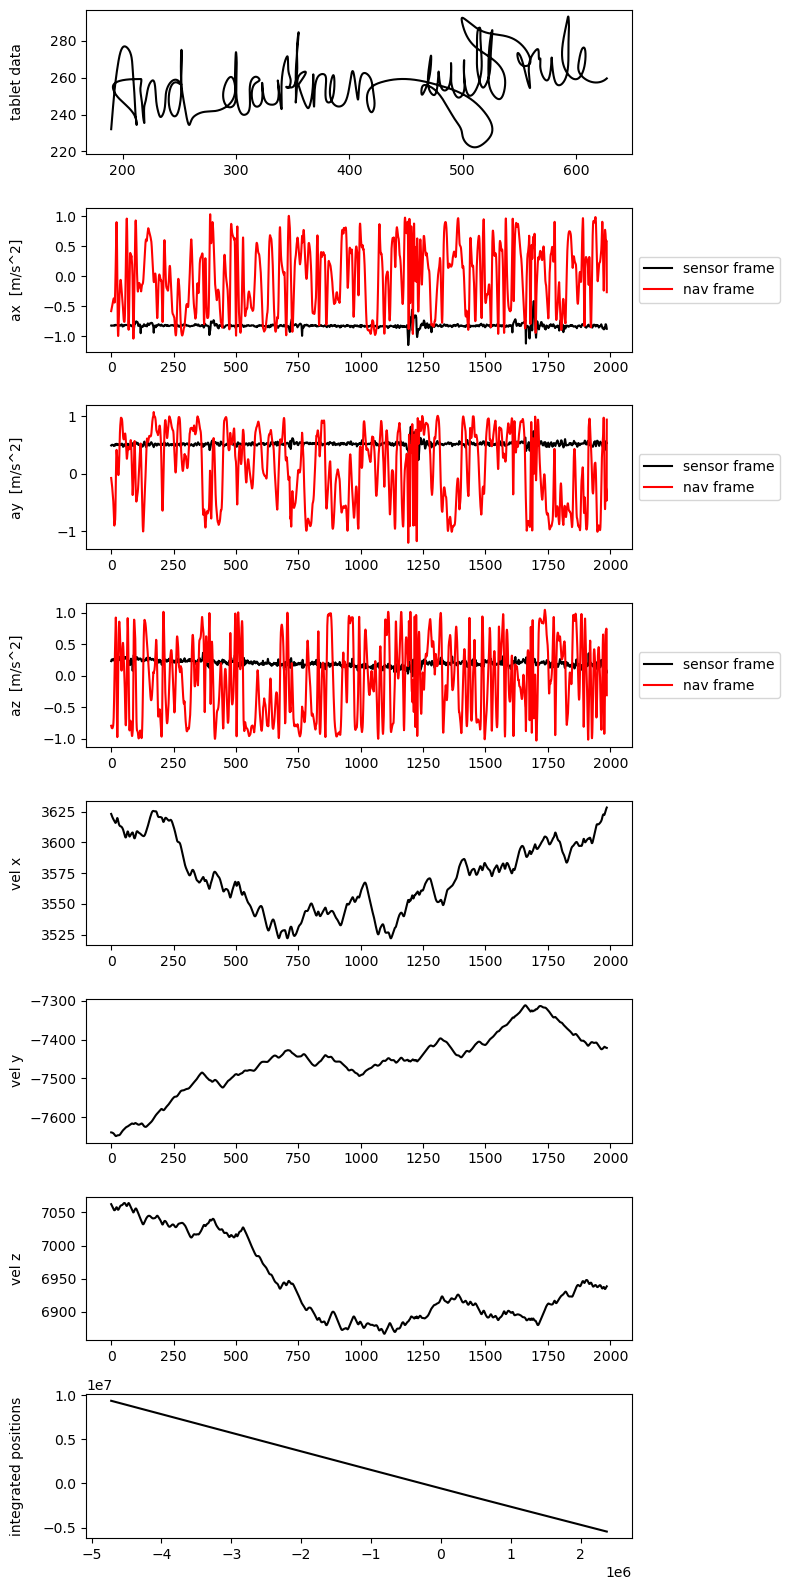

In [4]:
plot_ith_segment(data.data_set, 10)

In [5]:
model = PredictionModelTrace(data.data_set)

Split into test and trainings data...
Extract segments and labels...
[]
reshaped labels shape:  (52, 5856, 1) reshaped segments shape:  (52, 5856, 16)
Extract segments and labels...
[]
reshaped labels shape:  (52, 5856, 1) reshaped segments shape:  (52, 5856, 16)
The trainings data is of shape (52, 5856, 16) and (52, 5856, 1) and the test data is of shape (52, 5856, 16) and (52, 5856, 1)
Fitting model...
layer 0: <keras.engine.input_layer.InputLayer object at 0x0000023E8833C0A0>
	has input mask: None
	has output mask: None
layer 1: <keras.layers.core.masking.Masking object at 0x0000023E81DDFBB0>
	has input mask: None
	has output mask: KerasTensor(type_spec=TensorSpec(shape=(None, 5856), dtype=tf.bool, name=None), name='masking/Squeeze:0')
layer 2: <keras.layers.rnn.lstm.LSTM object at 0x0000023EE7316F50>
	has input mask: KerasTensor(type_spec=TensorSpec(shape=(None, 5856), dtype=tf.bool, name=None), name='masking/Squeeze:0')
	has output mask: KerasTensor(type_spec=TensorSpec(shape=(Non

c:\Users\ann-k\anaconda3\envs\patternRecognition2\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 27s 27s/step - loss: 489.0142 - val_loss: 48.9602
Epoch 2/10
1/1 [==============================] - 12s 12s/step - loss: 488.8108 - val_loss: 48.9417
Epoch 3/10
1/1 [==============================] - 12s 12s/step - loss: 488.6349 - val_loss: 48.9173
Epoch 4/10
1/1 [==============================] - 11s 11s/step - loss: 488.3949 - val_loss: 48.8800
Epoch 5/10
1/1 [==============================] - 11s 11s/step - loss: 488.0263 - val_loss: 48.8091
Epoch 6/10
1/1 [==============================] - 12s 12s/step - loss: 487.3133 - val_loss: 48.6651
Epoch 7/10


KeyboardInterrupt: 

In [33]:
import tensorflow as tf
segments = []
labels = []

dataframe = data.data_set

LENGTH_SEGMENT = np.max(dataframe.groupby("segment").size())
PAD_VALUE = -1000
INPUT_DIM = 16
OUTPUT_DIM = 3 
num_segments = dataframe["segment"].iloc[-1]



for i in range(num_segments):
    d_i = dataframe[dataframe["segment"] == i].iloc[:,1:] # do not use t column as feature
    d_i = d_i.drop("segment", axis=1)
    d_i = d_i.drop("r", axis=1)
    #ax,ay,az, gx,gy,gz, q0,q1,q2,q3,r,nav_ax,nav_ay,nav_az,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z
    features = d_i.iloc[:,3:].to_numpy().flatten().tolist()
    positions = d_i.iloc[:,:3].to_numpy().flatten().tolist()
    list() #xyz


    segments.append(features)
    labels.append(positions)

segments = tf.keras.preprocessing.sequence.pad_sequences(segments, padding="post", value=PAD_VALUE, maxlen= LENGTH_SEGMENT * INPUT_DIM)
labels = tf.keras.preprocessing.sequence.pad_sequences(labels, padding="post", value=PAD_VALUE, maxlen= LENGTH_SEGMENT * OUTPUT_DIM)

print(np.asarray(segments, dtype= np.float32).shape)
print(np.asarray(labels, dtype= np.float32).shape)

reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(num_segments,-1, INPUT_DIM)
reshaped_labels = np.asarray(labels, dtype= np.float32).reshape(num_segments,-1, OUTPUT_DIM)

print("reshaped labels shape: ",reshaped_labels.shape, "reshaped segments shape: ", reshaped_segments.shape)
#print(reshaped_labels[:1,:10,:])

(52, 93696)
(52, 17568)
reshaped labels shape:  (52, 5856, 3) reshaped segments shape:  (52, 5856, 16)


In [14]:
d_i = data.data_set[data.data_set["segment"] == 1].iloc[:,1:]

In [21]:
np.max(data.data_set.groupby("segment").size())

5856

In [15]:
d_i.head()

,x,y,z,ax,ay,az,gx,gy,gz,segment,...,r,nav_ax,nav_ay,nav_az,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z
204,115.269106,175.624097,0.0,-0.832227,0.392970,0.371468,0.161383,-0.183090,-0.144410,1,...,"[[0.702064015288151, 0.23639219534008754, -0.6...",-0.740909,-0.484775,0.448399,71.183380,32.668866,-34.891296,-4415.843503,-1240.956105,617.101491
205,115.481684,176.233321,0.0,-0.831776,0.395144,0.370421,0.156479,-0.190245,-0.145552,1,...,"[[0.6189182436129691, 0.32718836824225395, -0....",-0.650019,-0.494061,0.564430,70.835648,32.424156,-34.638089,-4380.338746,-1224.682849,599.719145
206,115.696610,176.830753,0.0,-0.831325,0.397319,0.369373,0.151576,-0.197400,-0.146693,1,...,"[[0.5265778114255684, 0.4179993098299388, -0.7...",-0.545113,-0.488312,0.670674,70.536865,32.178563,-34.329313,-4344.995618,-1208.532169,582.477294
207,115.913791,177.416749,0.0,-0.830875,0.399493,0.368326,0.146672,-0.204555,-0.147834,1,...,"[[0.42845176970423227, 0.5055881246386791, -0....",-0.429840,-0.467540,0.763057,70.293127,31.939600,-33.970880,-4309.788119,-1192.502628,565.402246
208,116.133137,177.991667,0.0,-0.830820,0.401323,0.371887,0.142226,-0.207918,-0.147553,1,...,"[[0.32739052843316374, 0.5877470245874743, -0....",-0.311264,-0.435403,0.838547,70.107851,31.713865,-33.570479,-4274.687875,-1176.589262,548.516906


In [20]:
d_i.drop("segment", axis=1)

,x,y,z,ax,ay,az,gx,gy,gz,q0,...,r,nav_ax,nav_ay,nav_az,vel_x,vel_y,vel_z,pos_x,pos_y,pos_z
204,115.269106,175.624097,0.0,-0.832227,0.392970,0.371468,0.161383,-0.183090,-0.144410,-0.164786,...,"[[0.702064015288151, 0.23639219534008754, -0.6...",-0.740909,-0.484775,0.448399,71.183380,32.668866,-34.891296,-4415.843503,-1240.956105,617.101491
205,115.481684,176.233321,0.0,-0.831776,0.395144,0.370421,0.156479,-0.190245,-0.145552,-0.207168,...,"[[0.6189182436129691, 0.32718836824225395, -0....",-0.650019,-0.494061,0.564430,70.835648,32.424156,-34.638089,-4380.338746,-1224.682849,599.719145
206,115.696610,176.830753,0.0,-0.831325,0.397319,0.369373,0.151576,-0.197400,-0.146693,-0.247287,...,"[[0.5265778114255684, 0.4179993098299388, -0.7...",-0.545113,-0.488312,0.670674,70.536865,32.178563,-34.329313,-4344.995618,-1208.532169,582.477294
207,115.913791,177.416749,0.0,-0.830875,0.399493,0.368326,0.146672,-0.204555,-0.147834,-0.285012,...,"[[0.42845176970423227, 0.5055881246386791, -0....",-0.429840,-0.467540,0.763057,70.293127,31.939600,-33.970880,-4309.788119,-1192.502628,565.402246
208,116.133137,177.991667,0.0,-0.830820,0.401323,0.371887,0.142226,-0.207918,-0.147553,-0.320232,...,"[[0.32739052843316374, 0.5877470245874743, -0....",-0.311264,-0.435403,0.838547,70.107851,31.713865,-33.570479,-4274.687875,-1176.589262,548.516906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,600.501470,245.122250,0.0,-0.877938,0.403946,0.247419,-0.102819,-0.092799,0.021424,-0.259523,...,"[[-0.8642130246415094, -0.21094156614808274, -...",0.560503,0.058192,-0.823174,-152.116707,271.028019,41.212759,-24958.650541,381603.182816,-42998.694817
5375,599.970781,245.154627,0.0,-0.881142,0.394386,0.257032,-0.134237,-0.100989,0.037365,-0.294522,...,"[[-0.8250335981189625, -0.2134380474149629, -0...",0.508310,0.097732,-0.854451,-151.849504,271.067000,40.793352,-25034.642094,381738.706571,-42978.193289
5376,599.465324,245.166531,0.0,-0.886431,0.376128,0.289882,-0.173330,-0.108789,0.058206,-0.331571,...,"[[-0.7783057441364147, -0.20069728873014098, -...",0.441962,0.136931,-0.892852,-151.611936,271.125666,40.356527,-25110.507454,381874.254737,-42957.905819
5377,598.993306,245.167930,0.0,-0.891720,0.357871,0.322733,-0.212424,-0.116589,0.079048,-0.369723,...,"[[-0.7245136552343343, -0.16930232541747378, -...",0.369843,0.200447,-0.922188,-151.408984,271.210011,39.902767,-25186.262684,382009.838656,-42937.840996


In [19]:
d_i.columns

Index(['x', 'y', 'z', 'ax', 'ay', 'az', 'gx', 'gy', 'gz', 'segment', 'q0',
       'q1', 'q2', 'q3', 'r', 'nav_ax', 'nav_ay', 'nav_az', 'vel_x', 'vel_y',
       'vel_z', 'pos_x', 'pos_y', 'pos_z'],
      dtype='object')

In [16]:
positions = d_i.iloc[:,:3].to_numpy().flatten()

In [18]:
positions[:10]

array([115.26910635, 175.62409708,   0.        , 115.48168437,
       176.23332098,   0.        , 115.69660998, 176.83075293,
         0.        , 115.91379134])

In [10]:
f = d_i.to_numpy().flatten()

In [13]:
f

array([0.0, 115.2691063503647, 175.6240970806941, ..., -25261.97431817226,
       382145.5108380709, -42917.93362797727], dtype=object)

Split into test and trainings data...
Extract segments and labels...
(41, 38000)
(41, 7125)
reshaped labels shape:  (41, 2375, 3) reshaped segments shape:  (41, 2375, 16)
[[[-125.  727.    0.]
  [-125.  727.    0.]
  [-125.  727.    0.]
  [-125.  727.    0.]
  [-125.  727.    0.]
  [-125.  727.    0.]
  [-125.  727.    0.]
  [-125.  727.    0.]
  [-125.  727.    0.]
  [-125.  727.    0.]]]
Extract segments and labels...
(12, 38000)
(12, 7125)
reshaped labels shape:  (12, 2375, 3) reshaped segments shape:  (12, 2375, 16)
[[[351. 263.   0.]
  [352. 265.   0.]
  [354. 267.   0.]
  [354. 270.   0.]
  [354. 273.   0.]
  [354. 274.   0.]
  [354. 275.   0.]
  [354. 276.   0.]
  [354. 276.   0.]
  [354. 276.   0.]]]
Create the LSTM model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, 2375, 16)          0         
                                       

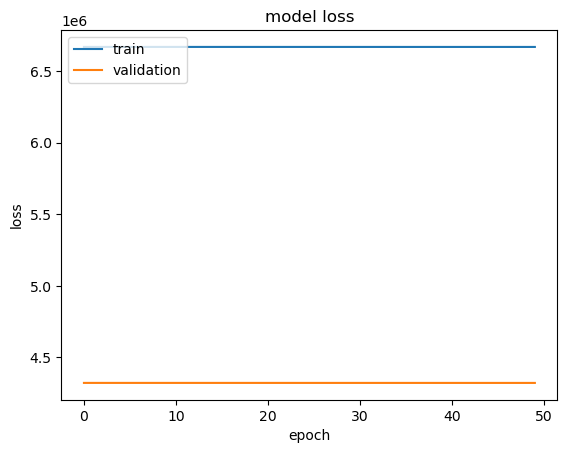

Use  model on test data...
1/1 [==============================] - 1s 1s/step
First predictions for x:  [[ 0.11210176 -0.04923096 -0.07634206]
 [ 0.1338795  -0.11828928  0.02020528]
 [ 0.13539061 -0.07613033 -0.0217196 ]
 [ 0.15749376 -0.16169806  0.16970375]
 [ 0.20841125  0.08247066  0.08221924]]
First predictions for y:  [[ 0.10885115 -0.10888974 -0.09551005]
 [ 0.30022472 -0.11760599  0.05698336]
 [ 0.22174461 -0.21638595 -0.05868706]
 [ 0.27983543 -0.26286772  0.28509045]
 [ 0.34457675 -0.01241947  0.13597506]]


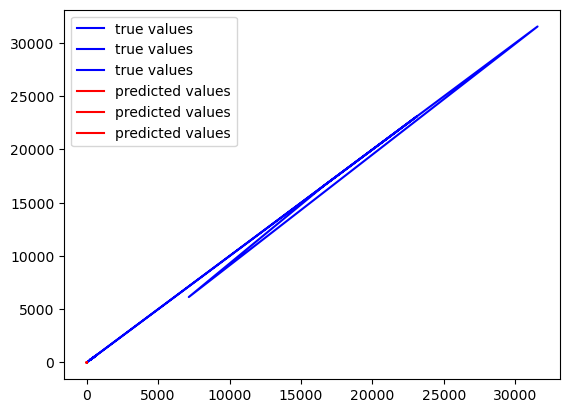

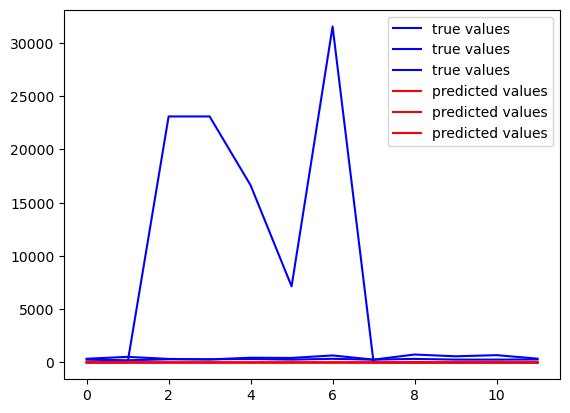

In [3]:
model = PredictionModelTrace(data)

In [40]:
import tensorflow as tf

segments = []
labels = []
split_indices, = np.where(data["reset"] == 1)
# add beginning and end to the split indices
split_indices = np.insert(split_indices, 0, 0)
split_indices = np.append(split_indices, len(data)-1)

l = max(np.diff(split_indices))

dataframe = data
for i in range(0,len(split_indices)-1):
    vel_x = dataframe['vel_x'].values[split_indices[i]: split_indices[i+1]]
    vel_y = dataframe['vel_y'].values[split_indices[i]: split_indices[i+1]]
    vel_z = dataframe['vel_z'].values[split_indices[i]: split_indices[i+1]]
    nav_x = dataframe['nav_ax'].values[split_indices[i]: split_indices[i+1]]
    nav_y = dataframe['nav_ay'].values[split_indices[i]: split_indices[i+1]]
    nav_z = dataframe['nav_az'].values[split_indices[i]: split_indices[i+1]]
    ax = dataframe['ax'].values[split_indices[i]: split_indices[i+1]]
    ay = dataframe['ay'].values[split_indices[i]: split_indices[i+1]]
    az = dataframe['az'].values[split_indices[i]: split_indices[i+1]]
    gx = dataframe['gx'].values[split_indices[i]: split_indices[i+1]]
    gy = dataframe['gy'].values[split_indices[i]: split_indices[i+1]]
    gz = dataframe['gz'].values[split_indices[i]: split_indices[i+1]]
    q0 = dataframe['q0'].values[split_indices[i]: split_indices[i+1]]
    q1 = dataframe['q1'].values[split_indices[i]: split_indices[i+1]]
    q2 = dataframe['q2'].values[split_indices[i]: split_indices[i+1]]
    q3 = dataframe['q3'].values[split_indices[i]: split_indices[i+1]]

    x = dataframe['x'].values[split_indices[i]: split_indices[i+1]].reshape(-1,1)
    y = dataframe['y'].values[split_indices[i]: split_indices[i+1]].reshape(-1,1)
    z = dataframe['z'].values[split_indices[i]: split_indices[i+1]].reshape(-1,1)

    features = np.transpose(np.hstack((vel_x, vel_y, vel_z, nav_x, nav_y, nav_z, ax, ay, az, gx, gy, gz, q0, q1, q2, q3))).flatten()
    
    positions = np.hstack((x,y,z))
    if i == 0:
        print(positions)
    positions = positions.flatten()
    if i == 0:
        print(positions)

    segments.append(features)
    labels.append(positions)

segments = tf.keras.preprocessing.sequence.pad_sequences(segments, padding="post", value = -1000, maxlen=l*16)
labels = tf.keras.preprocessing.sequence.pad_sequences(labels, padding="post", value = -1000, maxlen= l*3)

reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(len(split_indices)-1,-1, 16)
reshaped_labels = np.asarray(labels, dtype= np.float32).reshape(len(split_indices)-1,-1, 3)

print(reshaped_labels.shape)
print(reshaped_segments.shape)


[[ -125.           727.             0.        ]
 [ -125.           727.             0.        ]
 [ -125.           727.             0.        ]
 ...
 [  165.10208286   131.09215235 22709.28755394]
 [  165.10208286   131.29098308 21275.94664018]
 [  165.10208286   131.40510018 20991.        ]]
[ -125.           727.             0.         ...   165.10208286
   131.40510018 20991.        ]
(52, 2375, 3)
(52, 2375, 16)
